# 신경망과 MLP

신경망을 이용한 계산과 다층신경망을 사용한 학습을 살펴본다.

> `교안2-01신경망과_머신러닝`

In [ ]:
import numpy as np
import pandas as pd

# 1. Neural Network 

신경망 개요

- 신경망은 숫자로 구성된 행렬
- 신경망의 각 계층에는 숫자로 구성
-  숫자 행렬의 집합
-  이 행렬에 입력을 넣어 가중되는 값을 계산

기술적으로 신경망은 하나 이상의 입력에 대해 가중치를 연산 결과를 활성화 함수에 의해 출력하는 것이다.

![image.png](https://i.imgur.com/Vy1wreM.jpg)

### 랜덤한 수 생성


In [ ]:
# 랜덤한 수 얻기 (균일 분포)
rand = np.random.uniform(0,1,size=(1,))
rand

In [ ]:
# 랜덤한 수 여러 개 얻기 (균일 분포)
rand = np.random.uniform(0,1,size=(4))
rand

In [ ]:
rand = np.random.uniform(0,1,size=(4,3))
rand

In [ ]:
rand.shape, rand.size, rand.dtype

정규분포

In [ ]:
# 랜덤한 수 여러 개 얻기 (정규 분포)
np.random.normal(0,1,size=(4,))

In [ ]:
np.random.normal(0,1,size=(4,3))

In [ ]:
# 파이썬에서 리스트에 정수를 곱하기
print([1,2,3]*2)
print([1,2,3]*0)
print([1,2,3]*-1)

In [ ]:
# 파이썬에서 리스트에 실수를 곱하기
print([1,2,3]*0.01)

In [ ]:
# 넘파이 array 에 정수, 실수를 곱하기
import numpy as np

print(np.array([1,2,3])*2)
print(np.array([1,2,3])*0)
print(np.array([1,2,3])*-1)
print(np.array([1,2,3])*0.01)

###	분포 데이터 그래프 그리기

In [ ]:
# 간단한 꺾은선 그래프 그리기
import matplotlib.pyplot as plt

x = range(20)
y = np.random.normal(0,1,size=(20,))

plt.plot(x,y)
plt.show()

In [ ]:
# 간단한 점 그래프 그리기
# x = range(20)
# y = np.random.normal(0,1,size=(20,))

plt.plot(x,y,'bo')
plt.show()

In [ ]:
# 정규분포 그래프를 히스토그램으로 나타내기
import matplotlib.pyplot as plt
random_normal = np.random.normal(0,1,size=(100000))

plt.hist(random_normal, bins=100)
plt.show()

## 뉴런 만들기

인공신경 퍼셉트론은 다수의 입력을 받아 활성화 함수를 통해 출력

<div align='center'>
<img src='https://www.researchgate.net/profile/Nicola-Fronzetti/publication/335609766/figure/fig1/AS:799455209078784@1567616383497/Perceptron-Minsky-Papert-1969.ppm'>
 - https://www.researchgate.net/figure/Perceptron-Minsky-Papert-1969_fig1_335609766
</div>

시그모이드 함수 선언
 -  https://numpy.org/doc/stable/reference/generated/numpy.exp.html

In [ ]:
# sigmoid 함수
import math

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

### x=1 일 때 y=0 을 얻는 뉴런의 학습

In [ ]:
# 뉴런의 입력과 출력 정의
x = 1
y = 0  # 기대출력!(예상) --> 정답!!!

w = np.random.normal(0,1,size=(1,))

output = sigmoid(x * w)
print(x, y, '===>', output)

In [ ]:
# 에러 = 기대출력 - 출력
y - output

### 데이터 포인트에 경사하강법 적용

모든 포인트의 차이를 줄이기 위해서 경사하강법을 사용한다. 

<img src='https://i.imgur.com/lYTSGrk.png' width='700'>

경사하강법에서 학습률을 통해서 차이를 줄이는 단계를 지정한다.
- 오차를 줄이는 조정자(Moderate)를 사용하고 이를 학습률(Learning Rate)라고 한다.
 - 가중치, 입력 과 에러에 학습률을 곱해서 더해준다.

<img src='https://i.imgur.com/MCgLzKd.png' width='700'>

In [ ]:
# 경사 하강법을 이용한 뉴런의 학습
x, y = 1, 0   # 기대출력 (정답)

learning_rate = 0.1 # 학습률

w = np.random.normal(0,1,size=(1,))

In [ ]:
for i in range(1000):
    output = sigmoid(x * w)
    error = y - output
    w = w + x * learning_rate * error
    
    if i % 100 == 99:
        print(i, error, output)

### x=0 일 때 y=1 을 얻는 뉴런의 학습

 - 경사하강법에 의해 가중치가 변화하지 않는다.


In [ ]:
# x=0 일 때 y=1 을 얻는 뉴런의 학습
x, y = 0, 1   # 기대출력 (정답)

learning_rate = 0.1
w = np.random.normal(0,1,size=(1,))

for i in range(1000):
    output = sigmoid(x * w)
    error = y - output
    w = w + x * learning_rate * error
    
    if i % 100 == 99:
        print(i, error, output)

입력이 0으로 치우쳐서 $x\gt0$ 인 상태를 유지하고, 치우침을 방지할 **편향(bias) **가 필요 

### 편향 도입

 - 입력이 0으로 치우쳐서 $x\gt0$ 인 상태를 유지하고, 치우침을 방지할 편향(bias)가 필요 


<img src='https://i.imgur.com/Lv4iHBC.png' width='700'>

In [ ]:
# x=0 일 때 y=1 을 얻는 뉴런의 학습에 편향을 더함
x, y = 0, 1
learning_rate = 0.1

w = np.random.normal(0,1,size=(1,))
b = np.random.normal(0,1,size=(1,))

for i in range(1000):
    output = sigmoid(x * w + 1 * b)
    error = y - output
    w = w + x * learning_rate * error
    b = b + 1 * learning_rate * error
    
    if i % 100 == 99:
        print(i, error, output)

In [ ]:
x, y = 0, 0   # 기대출력(정답) 0
learning_rate = 0.1

w = np.random.normal(0,1,size=(1,))
b = np.random.normal(0,1,size=(1,))

for i in range(1000):
    output = sigmoid(x * w + 1 * b)
    error = y - output
    w = w + x * learning_rate * error
    b = b + 1 * learning_rate * error
    
    if i % 100 == 99:
        print(i, error, output)

## 첫번째 신경망 네트워크 : AND

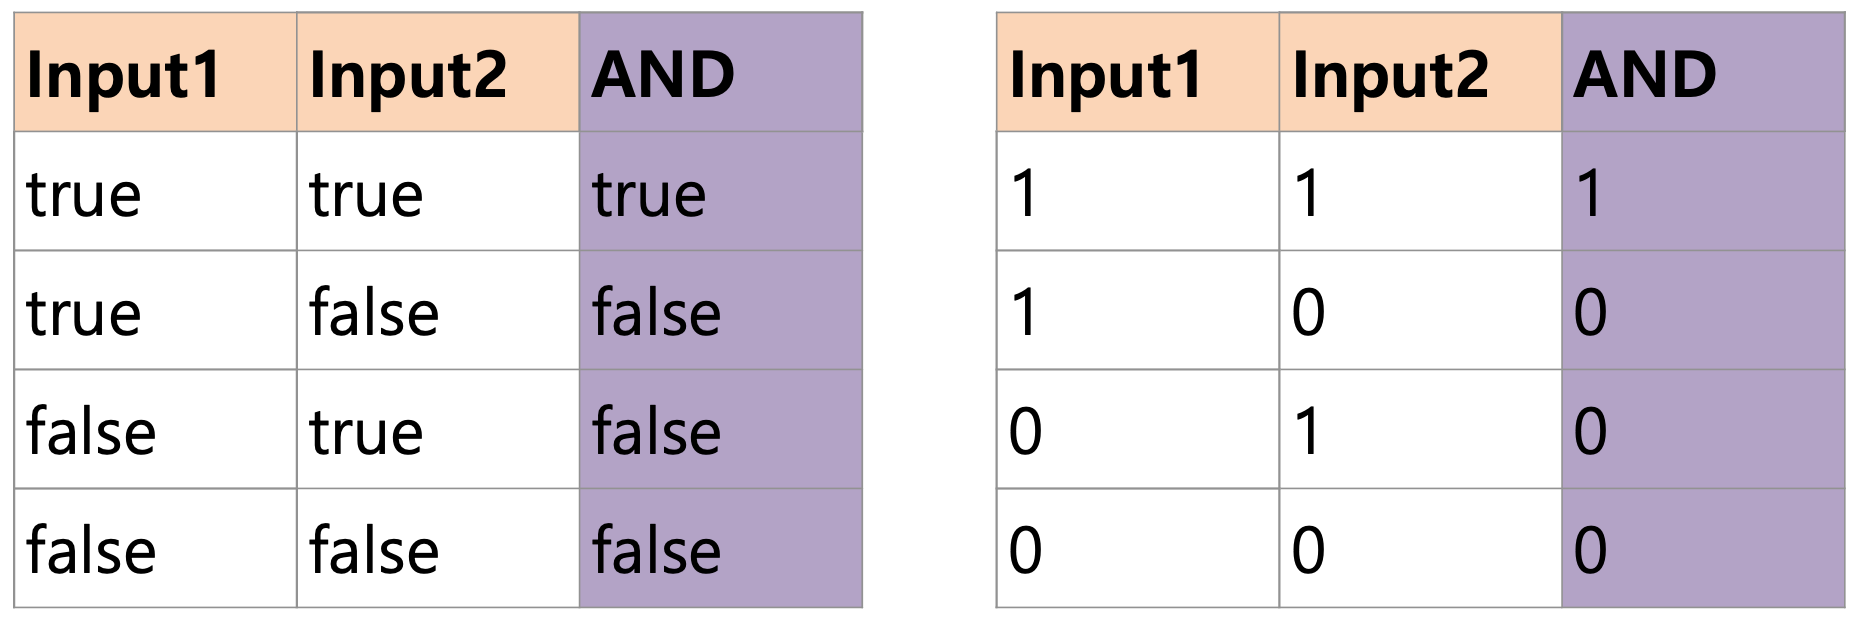

In [ ]:
# True, False 의 정수값 확인
print(int(True))
print(int(False))

In [ ]:
# 첫번째 신경망 네트워크 : AND
x = np.array([[1,1], 
              [1,0], 
              [0,1], 
              [0,0]])

In [ ]:
y = np.array([[1], [0], [0], [0]])

w = np.random.normal(0,1,size=(2,))
b = np.random.normal(0,1,size=(1,))

In [ ]:
w, b

In [ ]:
b_x = 1

for i in range(2000):
    error_sum = 0

    for j in range(4):
        output = sigmoid(np.sum(x[j]*w)+b_x*b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error  #학습률 0.1
        b = b + b_x * 0.1 * error
        error_sum += error
        
    if i % 200 == 199:
        print(i, error_sum, output)

이렇게 학습한 네트워크가 정상적으로 동작하는지 확인해 보자.

In [ ]:
# AND 네트워크의 평가
for i in range(4):
    _sum = np.sum(x[i]*w)+b  # y = ax + b
    print('X:', x[i], 'Y:', y[i], 'Sum:', _sum, 'Output:', sigmoid(_sum))

## 두번째 신경망 네트워크 : OR

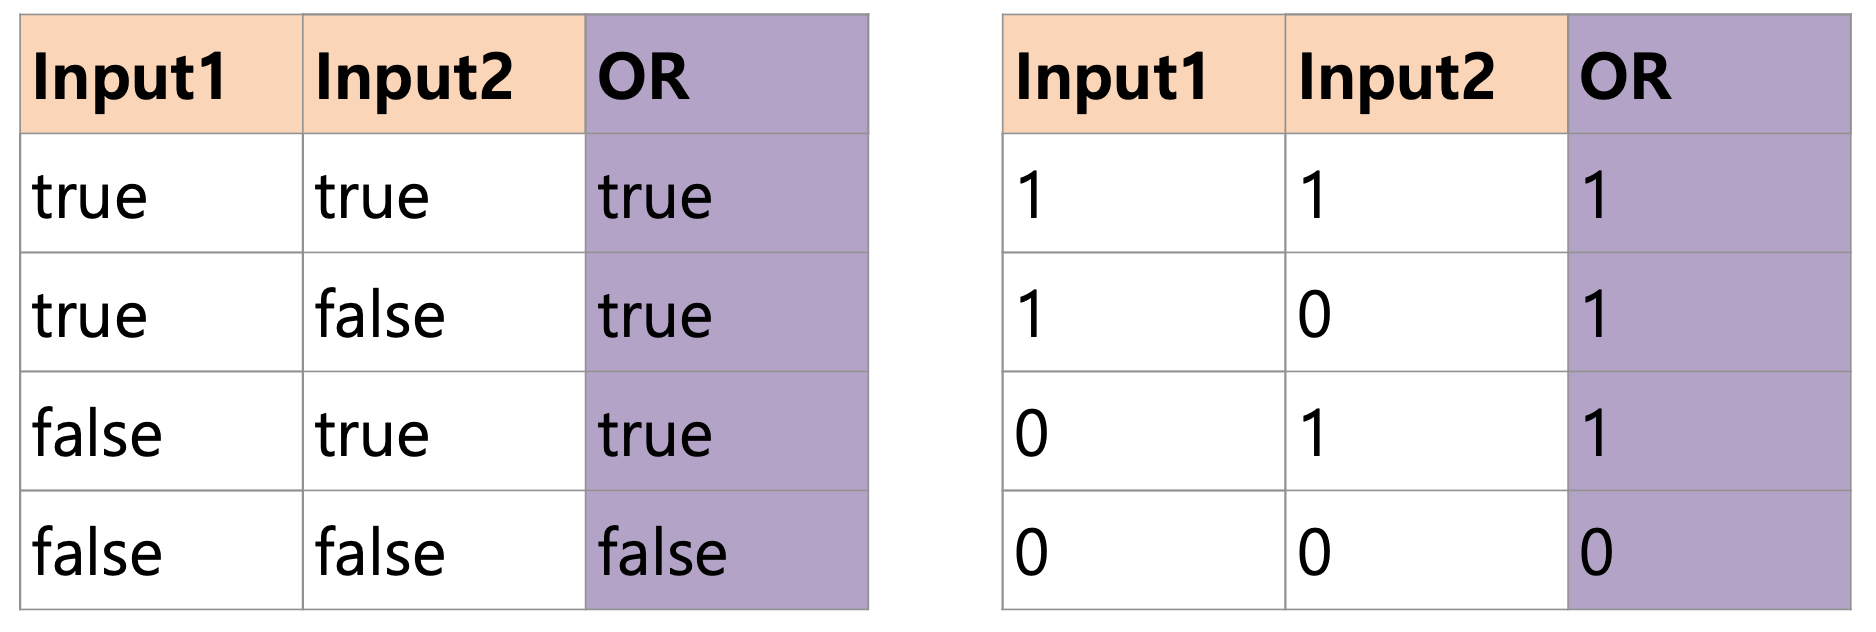

In [ ]:
# 두번째 신경망 네트워크 : OR
x = np.array([[1,1], 
              [1,0],
              [0,1],
              [0,0]])
y = np.array([[1], [1], [1], [0]])


In [ ]:
w = np.random.normal(0,1,size=(2,))
b = np.random.normal(0,1,size=(1,))

b_x = 1

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j]*w)+b_x*b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error
        
    if i % 200 == 199:
        print(i, error_sum)

In [ ]:
# OR 네트워크의 평가
for i in range(4):
    _sum = np.sum(x[i]*w)+b
    print('X:', x[i], 'Y:', y[i], 'Sum:', _sum, 'Output:', sigmoid(_sum))

평가를 해본 결과 중간 계산 값이 1보다 큰 값은 출력 Y 값은 1 근처 임을 알 수 있다.

## 세번째 신경망 네트워크 : XOR

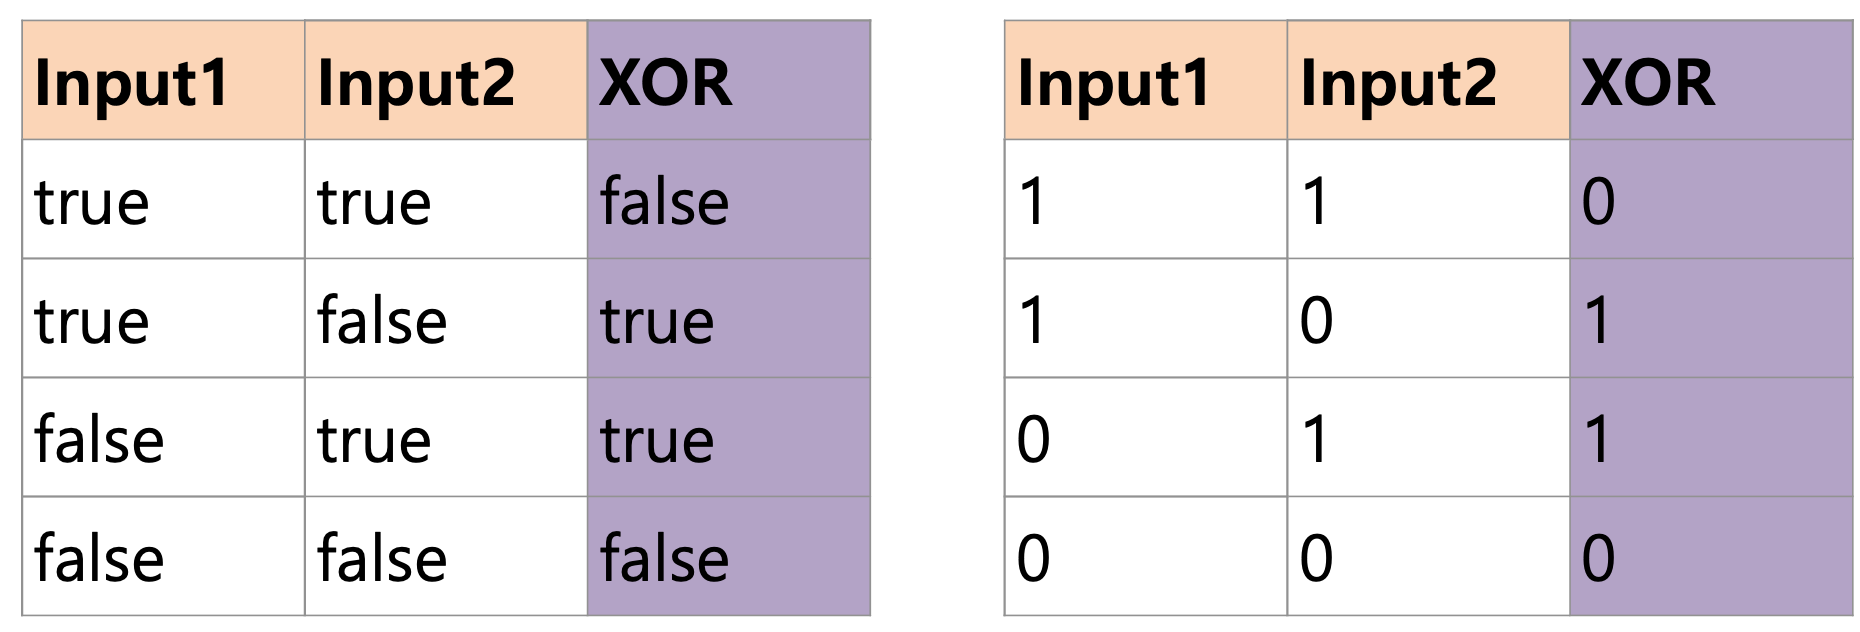

In [ ]:
# 세번째 신경망 네트워크 : XOR

x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[0], [1], [1], [0]])

w = np.random.normal(0,1,size=(2,))
b = np.random.normal(0,1,size=(1,))
# w = tf.random.normal([2],0,1)
# b = tf.random.normal([1],0,1)

In [ ]:
b_x = 1

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j]*w)+b_x*b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error
        
    if i % 200 == 199:
        print(i, error_sum)

에러 값이 줄다가 어느 순간 변하지 않는다.

#### XOR 네트워크의 평가


w, b 값을 확인해 보면 아래 같아서 w의 첫번째 입력이 영향을 크게 미치고, 편향도 거의 영향이 없을 것 으로 보인다. 


In [ ]:
print('w:', w)
print('b:', b)

In [ ]:
# XOR 네트워크의 평가
for i in range(4):
    _sum = np.sum(x[i]*w)+b
    print('X:', x[i], 'Y:', y[i], 'Sum:', _sum, 'Output:', sigmoid(_sum))

평가를 해본 결과 중간 계산 값이 0에 가까와 지므로 출력 Y 값은 0.5 근처 임을 알 수 있다.

이것을 AND 중간값 평가와 비교하면, 2개의 가중치가 비슷해서 입력 2개는 거의 비슷한 중요도를 갖는다. 편향은 음수로 중간값 계산을 음수로 보내는 경향을 갖고 두 가중치를 합해야 음수 편향을 이겨낸다.


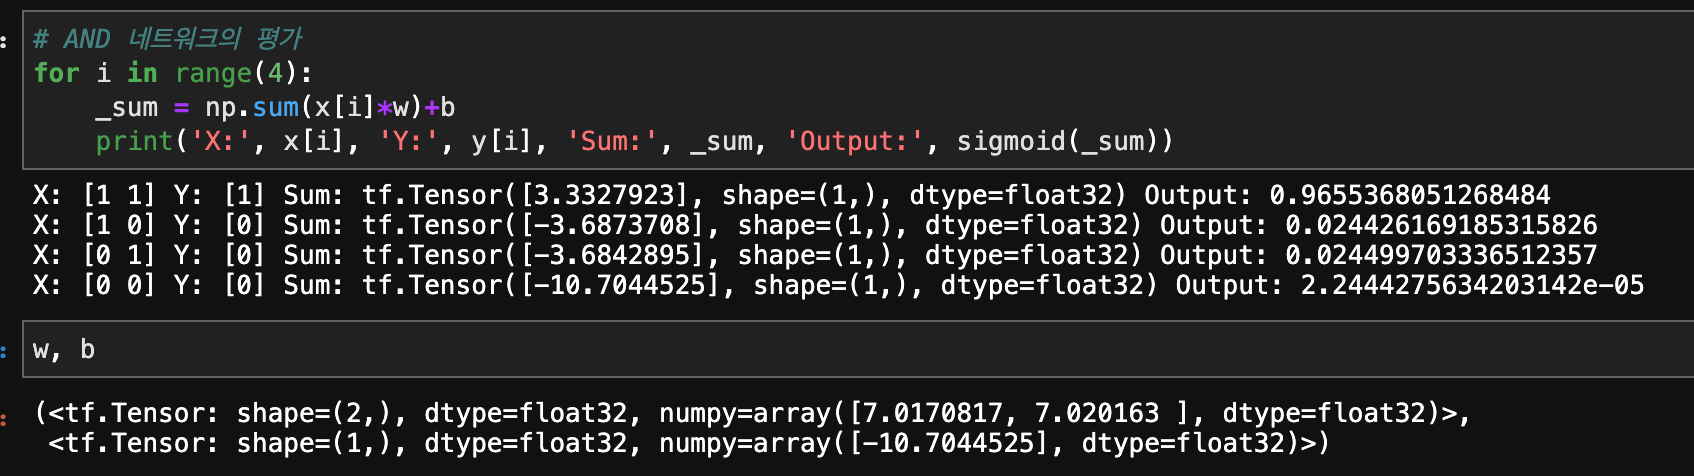


XOR의 문제는 인공지능의 겨울을 가져왔다. 하나의 퍼셉트론으론 XOR 문제를 해결 할 수 없다는 것이다.

# 2. MLP Multi Layerd Perceptron

퍼셉트론의 한계인 AND, OR, Xor 연산을 MLP 다층신경망 으로 학습 할 수 있다. 

![image.png](https://i.imgur.com/DbwhpZ3.png)


다층퍼셉트론을 이용해 단층퍼셉트론에서 불가능한 비선형 문제를 해결할 수 있고 XOR 게이트 문제도 풀 수 있다. 


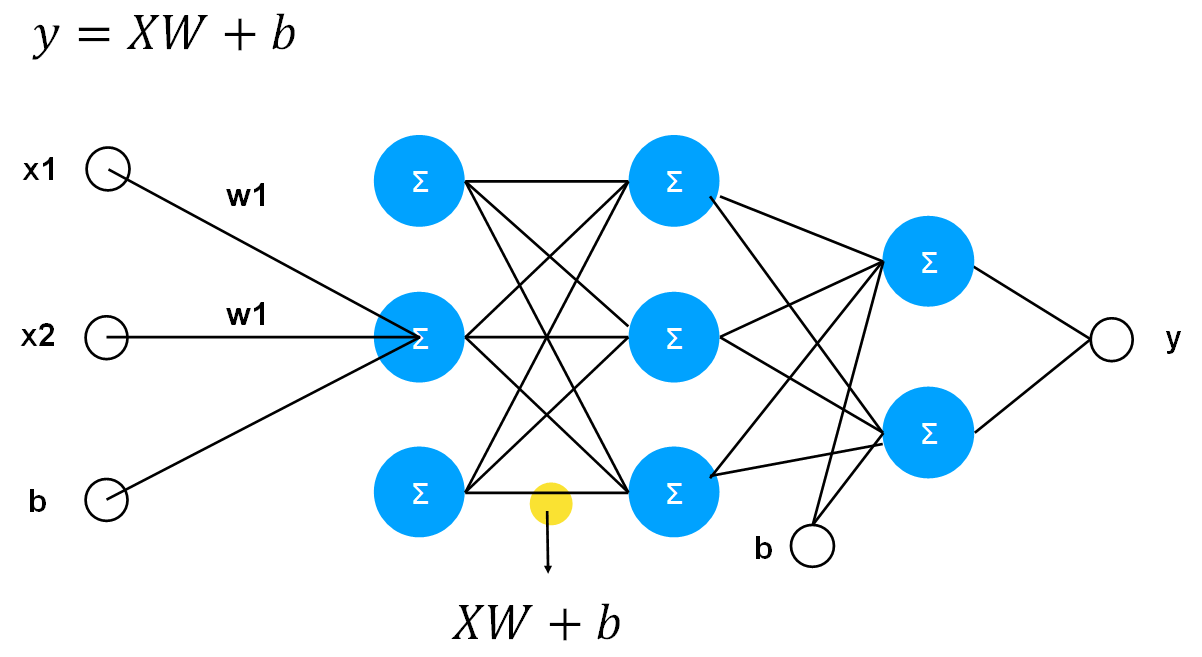

은닉층이 무수히 많은 신경망을 심층신경망이라고 한다.

은닉층 첫번째 퍼셉트론을 수식으로 나타내면

$$
a_{a}^{(1)} = b_{1}^{(1)} + w_{11}^{(1)}x_1 + w_{12}^{(1)}x_2
$$

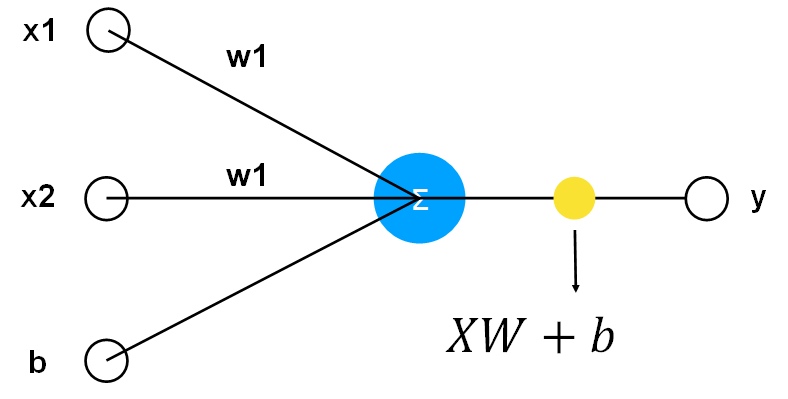

입력층에서 은닉층 세 개의 퍼셉트론까지 신호 전달 과정을 행렬 내적을 이용해 표현하면

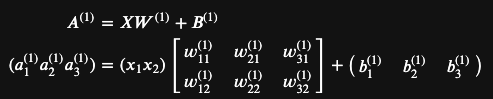

#### MLP Ouput layer 계산

이제 은닉층에서 출력층까지 신호 전달 과정도 살펴보자. 출력층 활성화 함수는 시그마 $\sigma$ 로 표시하고 활성화 함수는 풀고자 하는 문제에 따라 고르는데 일반적으로 회귀 문제는 항등 함수, 2분류 문제인 경우 시그모이드 함수, 다중 분류 문제는 소프트맥스를 사용한다.

이런 과정을 거쳐 신경망이 학습한다. 대부분 신경망 라이브러리들이 이런 과정으로 학습한다.

### MLP와 활성화 함수


퍼셉트론과 신경망은 다중 퍼셉트롤을 사용하며 활성화 함수 ( Activate function) 를 통해 출력을 내보낸다. 신경망( Neural Network) 은 활성화 함수로 Sigmoid 함수, Relu 함수 등을 사용합니다.

### 손실함수

위의 신경망을 통해 예측값을 도출했을 때 이 예측값과 실제 값과의 차이를 오차 혹은 손실이라 하고 이 손실을 계산하는 함수를 손실함수 Loss Function이라고 합니다.

< 오차함수 >

오차를 구할 수 있는 방법은 몇가지 있습니다.

1. 실제값 - 추론값

2. | 실제갑 - 추론값 | ( 오차를 구한후 절대값을 씌운다 )

3. ( 실제값 - 추론값 ) 의 제곱 -> Mean square Err (MSE ) 오차 제곱 평균

4. Cross Engropy


우리는 이 손실함수를 통해 계산된값 즉 오차값을 줄여나가 오차가 0에 가깝게 되는 상태를 만들고 이 오차를 0에 수렴하게 만드는 Weight와 bias 를 찾는 과정을 학습(Training)이라고 합니다.


# 3. Scikit-learn MLP XOR 학습

In [ ]:
! pip install sklearn

데이터를 학습 시킨다. 학습을 위해 scikit-learn의 SVM() 알고리즘을 사용해서 머신러닝을 수행한다. 
 - [SVM() API](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)
 - [Vector machines: Cassification](http://scikit-learn.org/stable/modules/svm.html#svm-classification)을 참조한다.

머신러닝 객체애 fit()으로 데이터를 입력해 준다.

In [ ]:
x = np.array([[1,1], [1,0], [0,1], [0,0]])      #학습 데이터 -> 훈련/검증 데이터를 준비!
y = np.array([[0], [1], [1], [0]])              # 라벨/기대출력/정답
x, y

In [ ]:
from sklearn import svm, metrics

clf = svm.SVC()

In [ ]:
clf.fit(x, y)

이제 학습의 결과를 예측해보기 위해 예측할 데이터를 전달하면 결과를 얻을 수 있다. 부가적으로 예측 결과와 해답을 맞춰 본다.

In [ ]:
pred = clf.predict(x)
print(" 예측결과:", pred)

In [ ]:
y

In [ ]:
x_new = np.array([[1,0]])     # 새로운 데이터 (측정 결과)
pred = clf.predict(x_new)
print(" 예측결과:", pred)

In [ ]:
x_new = np.array([[0,1]])
pred = clf.predict(x_new)
print(" 예측결과:", pred)

In [ ]:
x_new = np.array([[1,1]])
pred = clf.predict(x_new)
print(" 예측결과:", pred)

## 훈련/검증 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)
print('X_train/y_train 크기 {0} / {1}'.format(X_train.shape, y_train.shape))
print('X_test/y_test 크기 {0} / {1}'.format(X_test.shape, y_test.shape))

In [ ]:
from sklearn import svm, metrics

clf = svm.SVC()
clf.fit(X_train, y_train)

In [ ]:
X_test

In [ ]:
pred = clf.predict(X_test)
print(" 예측결과:", pre)

In [ ]:
x_new = np.array([[1,0]])
pred = clf.predict(x_new)
print(" 예측결과:", pre)

# 참고

> `교안2-01신경망과 머신러닝.pdf`

 - [NeuralNetwork(신경망) 개념 간단 정리](https://m.blog.naver.com/riverrun17/221897610579)
 - <시작하세요! 텐서플로 2.0 프로그래밍>
 - 파이썬 라이브러리를 활용한 머신 러닝 / 
 - 파이썬으로 배우는 머신러닝의 교과서 ch5  참고 필요